In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
import os
import matplotlib.pyplot as plt

In [6]:
# Read files

# I'm storing GIS data in a folder called GIS_Data
file_path = os.path.join(os.getcwd(), "..", ".github/mekar_raya_gis_data", "Merge_Desa_AKKM.shp")
df = gpd.read_file(file_path)
df

,OBJECTID,Id,NAMA,BUFF_DIST,ORIG_FID,Shape_Leng,Shape_Area,Luas,Keterangan,Desa,Kecamatan,Kabupaten,Provinsi,geometry
0,0,0,None,0.0,0,0.000000,0.000000,0.000000,Bukan AKKM,Mekar Raya,Simpang Dua,Ketapang,Kalimantan Barat,"MULTIPOLYGON (((426690.192 9906263.743, 426667..."
1,0,0,None,0.0,0,0.000000,0.000000,0.000000,"Bukan AKKM, Batas Luar Desa",Mekar Raya,Simpang Dua,Ketapang,Kalimantan Barat,"MULTIPOLYGON (((430524.798 9898704.234, 430535..."
2,1,2022096,Sungai Keramat Riam Bejangkar,20.0,1,722.603044,13554.342838,1.355434,None,Mekar Raya,Simpang Dua,Ketapang,Kalimantan Barat,"POLYGON ((424511.21 9905503.45, 424509.902 990..."
3,2,2022096,Sungai Keramat Tanikng,20.0,2,650.677886,11832.098350,1.183210,None,Mekar Raya,Simpang Dua,Ketapang,Kalimantan Barat,"POLYGON ((427855.303 9903487.718, 427853.995 9..."
4,3,2022096,Sungai Keramat Amun Tuda,20.0,0,1125.663122,21268.601676,2.126860,None,Mekar Raya,Simpang Dua,Ketapang,Kalimantan Barat,"POLYGON ((425399.508 9904691.127, 425396.254 9..."
5,0,2022092,Tembawang,0.0,0,0.000000,0.000000,5.175538,None,Mekar Raya,Simpang Dua,Ketapang,Kalimantan Barat,"POLYGON ((427053.303 9902420.719, 427030.762 9..."
6,0,2022092,Tembawang,0.0,0,0.000000,0.000000,0.856664,None,Mekar Raya,Simpang Dua,Ketapang,Kalimantan Barat,"POLYGON ((426866.684 9902812.722, 426884.234 9..."
7,0,2022092,Tembawang,0.0,0,0.000000,0.000000,2.506865,None,Mekar Raya,Simpang Dua,Ketapang,Kalimantan Barat,"POLYGON ((426232.317 9902743.291, 426269.359 9..."
8,0,2022092,Tembawang,0.0,0,0.000000,0.000000,2.456812,None,Mekar Raya,Simpang Dua,Ketapang,Kalimantan Barat,"POLYGON ((426629.193 9902518.394, 426623.901 9..."
9,0,2022092,Tembawang,0.0,0,0.000000,0.000000,1.812770,None,Mekar Raya,Simpang Dua,Ketapang,Kalimantan Barat,"POLYGON ((426801.503 9902659.285, 426817.378 9..."


<Axes: >

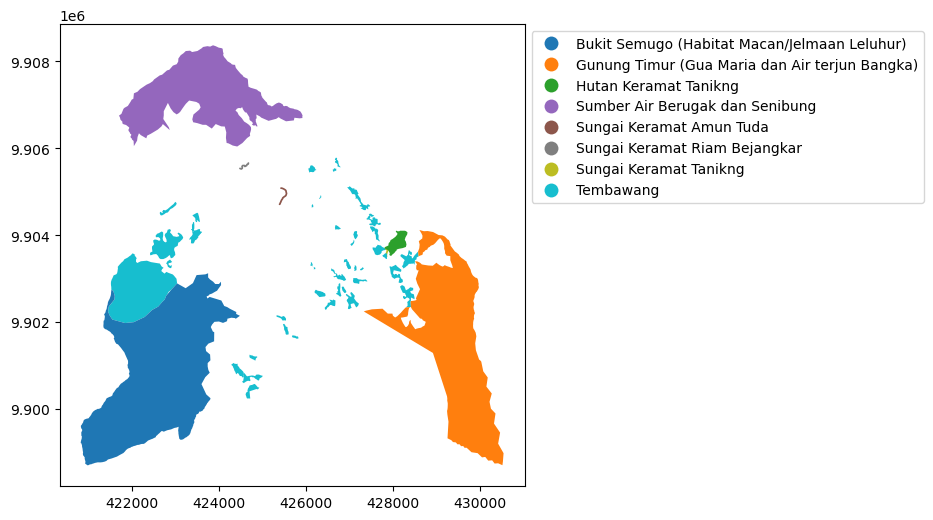

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
df.plot(
    column="NAMA",
    categorical=True,
    legend=True,
    legend_kwds={
        "loc": "upper left", 
        "bbox_to_anchor": (1, 1)
    },
    ax=ax
)


In [ ]:
# m = folium.Map(location=[-0.8833, 110.33], tiles ='Stadia.AlidadeSatellite', zoom_start=13)

# folium.GeoJson(
#     df.loc[df['NAMA'] == 'Tembawang'],
#     name="Tembawang",
#     tooltip=folium.GeoJsonTooltip(
#         fields=["Keterangan"],
#         localize=True
#     )
# ).add_to(m)

# m

ValueError: Custom tiles must have an attribution.

In [9]:
locations = [
    {
        "name": "Multi Storied Forest",
        "coords": (-0.86965, 110.32836),
        "video_path": "/Users/henryhong/Downloads/Multi Storied Forest/video.mp4"
    },
    {
        "name": "Foraging in the Orchard",
        "coords": (-0.86930, 110.32857),
        "video_path": "/Users/henryhong/Downloads/Foraging in the Orchard/video.mp4"
    }
]

In [ ]:
import geopandas as gpd
import folium
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Generate color palette using a colormap (brighter)
unique_names = df["NAMA"].unique()
colormap = cm.get_cmap('Set3', len(unique_names))  # use a pretty categorical colormap
name_to_color = {
    name: mcolors.to_hex(colormap(i)) for i, name in enumerate(unique_names)
}

# Style function for regions
def style_function(feature):
    region_name = feature["properties"]["NAMA"]
    return {
        "fillColor": name_to_color.get(region_name, "lightgray"),
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.6,
    }

# Create base map
m = folium.Map(location=[-0.8695, 110.3284], zoom_start=13)

# Add colored Tembawang boundaries
folium.GeoJson(
    df,
    name="Tembawang Boundaries",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=["NAMA"])
).add_to(m)

# === Video data structure with multiple videos per location ===
locations = [
    {
        "name": "Multi Storied Forest",
        "coords": (-0.86965, 110.32836),
        "folder": "multi_storied_forest",
        "videos": [
            "Dscf1780.mp4", "Dscf1783.mp4", "Dscf1790.mp4",
            "Dscf1791.mp4", "Dscf1792.mp4", "Dscf1793.mp4"
        ]
    },
    {
        "name": "Foraging in the Orchard",
        "coords": (-0.86930, 110.32857),
        "folder": "foraging_in_the_orchard",
        "videos": [
            "Dscf1761.mp4", "Dscf1762.mp4", "Dscf1763.mp4", "Dscf1765.mp4",
            "Dscf1766.mp4", "Dscf1767.mp4", "Dscf1768.mp4", "Dscf1769.mp4",
            "Dscf1770.mp4", "Dscf1771.mp4", "Dscf1772.mp4", "Dscf1776.mp4",
            "Dscf1782.mp4", "Dscf1785.mp4", "Dscf1794.mp4"
        ]
    }
]

# Add markers with dropdown-like video links
for loc in locations:
    video_list = [f"{loc['folder']}/{video}" for video in loc["videos"]]
    video_js_array = "[" + ",".join([f"'{v}'" for v in video_list]) + "]"

    html = f"""
    <b>{loc['name']}</b><br>
    <video id="{loc['name'].replace(' ', '_')}_video" width="220" controls>
      <source src="{video_list[0]}" type="video/mp4">
      Your browser does not support the video tag.
    </video><br>
    <button onclick="prevVideo_{loc['name'].replace(' ', '_')}()">Prev</button>
    <button onclick="nextVideo_{loc['name'].replace(' ', '_')}()">Next</button>

    <script>
    var videoIndex_{loc['name'].replace(' ', '_')} = 0;
    var videos_{loc['name'].replace(' ', '_')} = {video_js_array};
    function updateVideo_{loc['name'].replace(' ', '_')}() {{
        var video = document.getElementById("{loc['name'].replace(' ', '_')}_video");
        video.querySelector('source').src = videos_{loc['name'].replace(' ', '_')}[videoIndex_{loc['name'].replace(' ', '_')}];
        video.load();
    }}
    function nextVideo_{loc['name'].replace(' ', '_')}() {{
        videoIndex_{loc['name'].replace(' ', '_')}++;
        if (videoIndex_{loc['name'].replace(' ', '_')} >= videos_{loc['name'].replace(' ', '_')}.length) {{
            videoIndex_{loc['name'].replace(' ', '_')} = 0;
        }}
        updateVideo_{loc['name'].replace(' ', '_')}();
    }}
    function prevVideo_{loc['name'].replace(' ', '_')}() {{
        videoIndex_{loc['name'].replace(' ', '_')}--;
        if (videoIndex_{loc['name'].replace(' ', '_')} < 0) {{
            videoIndex_{loc['name'].replace(' ', '_')} = videos_{loc['name'].replace(' ', '_')}.length - 1;
        }}
        updateVideo_{loc['name'].replace(' ', '_')}();
    }}
    </script>
    """

    iframe = folium.IFrame(html=html, width=270, height=300)
    popup = folium.Popup(iframe, max_width=300)
    folium.Marker(location=loc["coords"], popup=popup).add_to(m)

# Display the map
m

/var/folders/bl/r4lpmbn54j5d3lnqmf8y9gnw0000gn/T/ipykernel_99821/1288171962.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Set3', len(unique_names))  # use a pretty categorical colormap


In [13]:
from IPython.display import HTML

HTML("""
<video width="640" height="360" controls>
  <source src="foraging_in_the_orchard/Dscf1782.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>
""")


In [26]:
import geopandas as gpd
import folium
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# === Tembawang boundaries ===
unique_names = df["NAMA"].unique()
colormap = cm.get_cmap('Set3', len(unique_names))
name_to_color = {name: mcolors.to_hex(colormap(i)) for i, name in enumerate(unique_names)}

def style_function(feature):
    return {
        "fillColor": name_to_color.get(feature["properties"]["NAMA"], "lightgray"),
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.6,
    }

# === Base map ===
m = folium.Map(location=[-0.8695, 110.3284], zoom_start=13)

folium.GeoJson(
    df,
    name="Tembawang Boundaries",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=["NAMA"])
).add_to(m)

# === Video locations ===
locations = [
    {
        "name": "Multi Storied Forest",
        "coords": (-0.86965, 110.32836),
        "folder": "multi_storied_forest",
        "videos": [
            "Dscf1780.mp4", "Dscf1783.mp4", "Dscf1790.mp4",
            "Dscf1791.mp4", "Dscf1792.mp4", "Dscf1793.mp4"
        ]
    },
    {
        "name": "Foraging in the Orchard",
        "coords": (-0.86930, 110.32857),
        "folder": "foraging_in_the_orchard",
        "videos": [
            "Dscf1761.mp4", "Dscf1762.mp4", "Dscf1763.mp4", "Dscf1765.mp4",
            "Dscf1766.mp4", "Dscf1767.mp4", "Dscf1768.mp4", "Dscf1769.mp4",
            "Dscf1770.mp4", "Dscf1771.mp4", "Dscf1772.mp4", "Dscf1776.mp4",
            "Dscf1782.mp4", "Dscf1785.mp4", "Dscf1794.mp4"
        ]
    }
]

# === Add clean text-based popup with links ===
for loc in locations:
    links_html = "".join([
        f'<li><a href="{loc["folder"]}/{v}" target="_blank">{v}</a></li>'
        for v in loc["videos"]
    ])

    popup_html = f"""
    <b>{loc['name']}</b>
    <ul>{links_html}</ul>
    """

    popup = folium.Popup(popup_html, max_width=300)
    folium.Marker(
        location=loc["coords"],
        popup=popup,
        tooltip=f"Videos: {loc['name']}"
    ).add_to(m)

# === Save map ===
m.save("tembawang_map_all_video_links.html")
print("✅ Saved: tembawang_map_all_video_links.html — open in browser via localhost.")
m

✅ Saved: tembawang_map_all_video_links.html — open in browser via localhost.


/var/folders/bl/r4lpmbn54j5d3lnqmf8y9gnw0000gn/T/ipykernel_99821/270518674.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Set3', len(unique_names))
